In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch as torch
from torch_nf.util import plot_dist
from torch_nf.systems import MF_V1_4n
import pandas as pd

Mas = [100]
Ls = [1, 2]
Us = [64]

fnames = []
npzfiles = []
losses = []
zs = []
log_probs = []
it_times = []
for Ma in Mas:
    for L in Ls:
        for U in Us:
            fname = 'APT_V1_M=2000_Ma=%d_H=64_64_MAF_L=%d_U=%d.npz' % (Ma, L, U)
            #try:
            npzfile = np.load('data/' + fname)
            #except:
            #    print(fname)
            #    continue
            fnames.append(fname)
            npzfiles.append(npzfile)
            losses.append(npzfile['losses'])
            zs.append(npzfile['zs'])
            log_probs.append(npzfile['log_probs'])
            it_times.append(npzfile['it_time'])
            
x0 = npzfiles[-1]['x0']
R = len(zs[0])

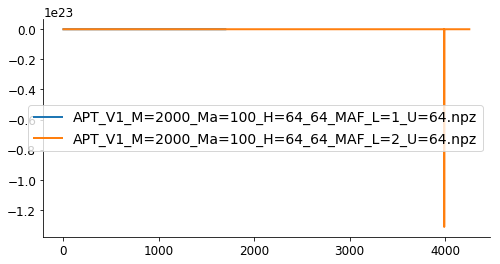

In [2]:
num_opts = len(fnames)

plt.figure(figsize=(8,4))
for i in range(num_opts):
    its = np.arange(len(losses[0]))
    time = its*it_times[i]
    plt.plot(time, -losses[i], label=fnames[i])
plt.legend()
#plt.ylim([-1, .01])
plt.show()

In [3]:
system = MF_V1_4n()
xs = []
for i in range(num_opts):
    xs_i = []
    for r in range(R+1):
        if r==0:
            z = system.prior.rvs(zs[i].shape[1])
        else:
            z = zs[i][r-1]
        print("i=%d/%d, r=%d/%d\r" % (i+1, num_opts, r, R), end="")
        xs_i.append(system.simulate(z))
    xs.append(xs_i)
xs = np.array(xs)

In [4]:
print(xs.shape)

(2, 7, 2000, 36)


In [5]:
m = len(system.T_x_labels)
for i in range(1,2):
    for r in range(R+1):
        d = {'fname':'opt%d' % (i+1), 'r':(r)}
        d.update(dict(zip(system.T_x_labels, [xs[i,r,:,j] for j in range(m)])))
        _df = pd.DataFrame(d)
        if (i==1 and r==0):
            df = _df
        else:
            df = pd.concat((df, _df))
df.head()
        

,fname,r,$\mu_{E}(0)$,$\mu_{S}(0)$,$\mu_{V}(0)$,$\mu_{E}(6)$,$\mu_{S}(6)$,$\mu_{V}(6)$,$\mu_{E}(12)$,$\mu_{S}(12)$,$\mu_{V}(12)$,$\Delta_{E}(0)$,$\Delta_{S}(0)$,$\Delta_{V}(0)$,$\Delta_{E}(6)$,$\Delta_{S}(6)$,$\Delta_{V}(6)$,$\Delta_{E}(12)$,$\Delta_{S}(12)$,$\Delta_{V}(12)$
0,opt2,0,0.090328,0.053908,0.014661,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.167158,0.198549,0.231258,0.332294,0.00,0.000000
1,opt2,0,1000.000000,1000.000000,1000.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,opt2,0,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00,1000.000000
3,opt2,0,0.000000,0.000000,0.018883,0.08004,0.168513,0.283569,0.059299,0.091035,0.131600,0.21638,0.351102,0.554992,0.000000,0.000000,0.000000,0.037031,0.09,0.137345
4,opt2,0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.093256,0.111370,0.120485,0.00000,0.000000,0.000000,0.000000,0.016403,0.028729,0.000000,0.00,0.000000


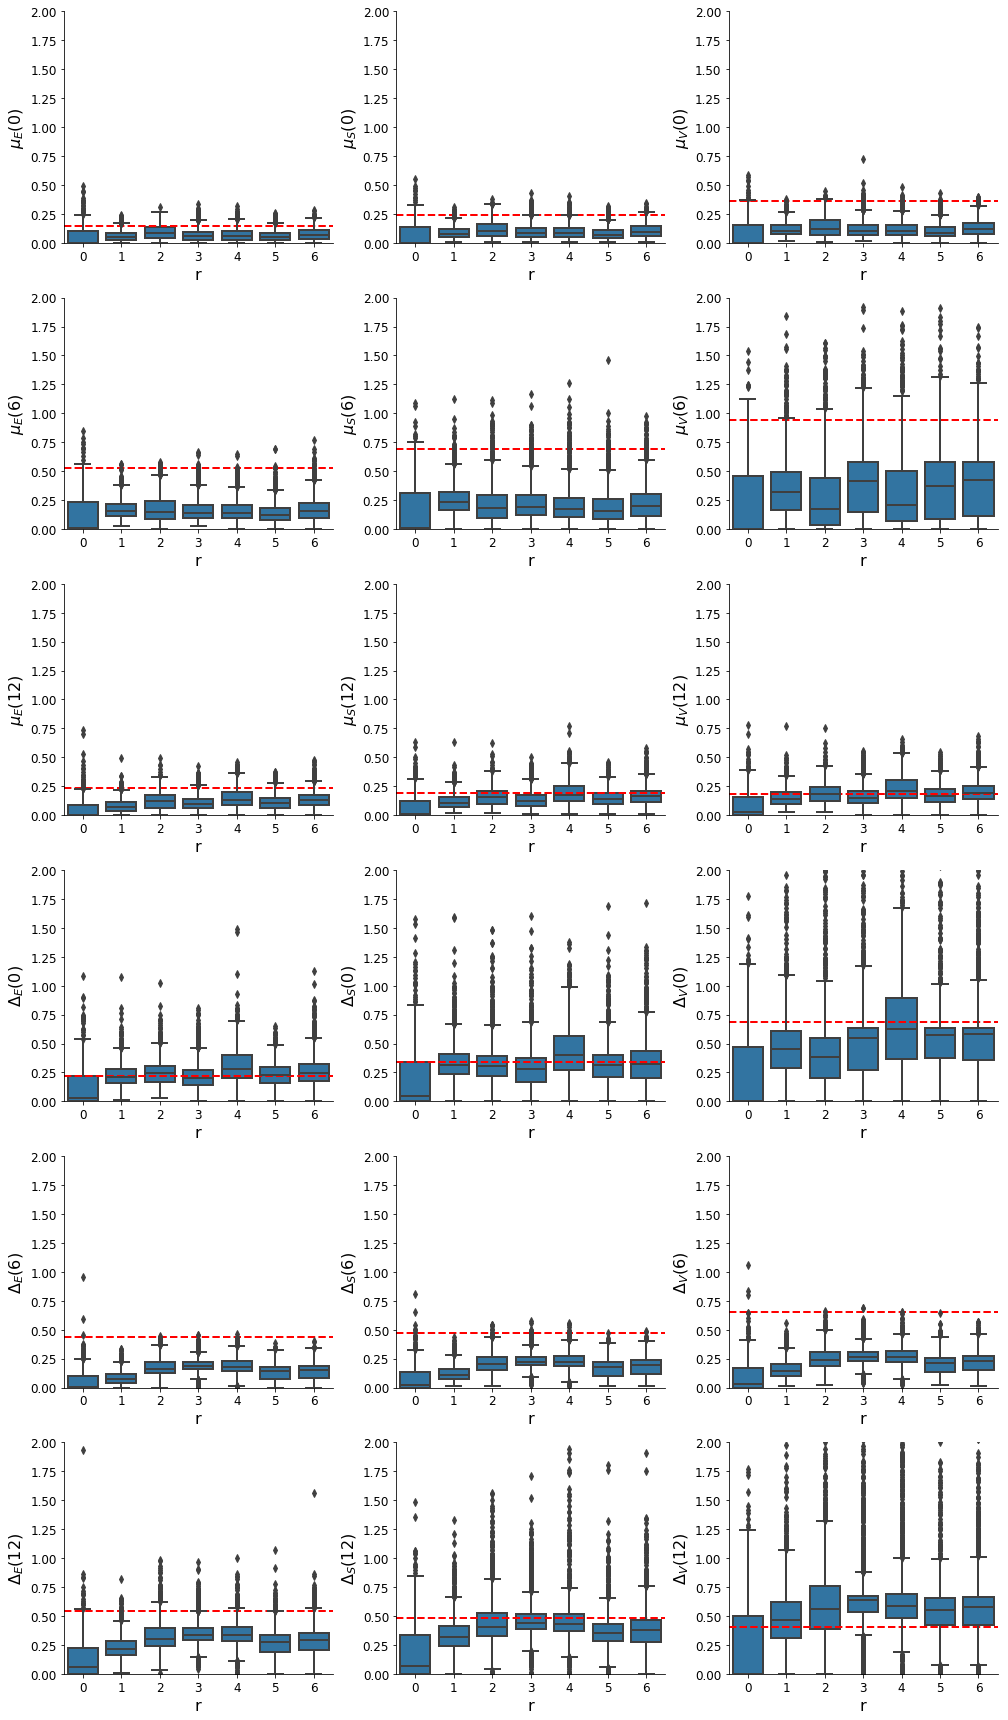

In [6]:
import seaborn as sns
fig, axs = plt.subplots(6, 3, figsize=(14, 24))
for i in range(m):
    ax = axs[i//3][i%3]
    ax.plot([-.5, R+.5], [x0[0,i], x0[0,i]], 'r--', lw=2)
    sns.boxplot(df['r'], df[system.T_x_labels[i]], hue=df['fname'], ax=ax)
    ax.set_ylim([0, 2])
    ax.legend().set_visible(False)
plt.tight_layout()

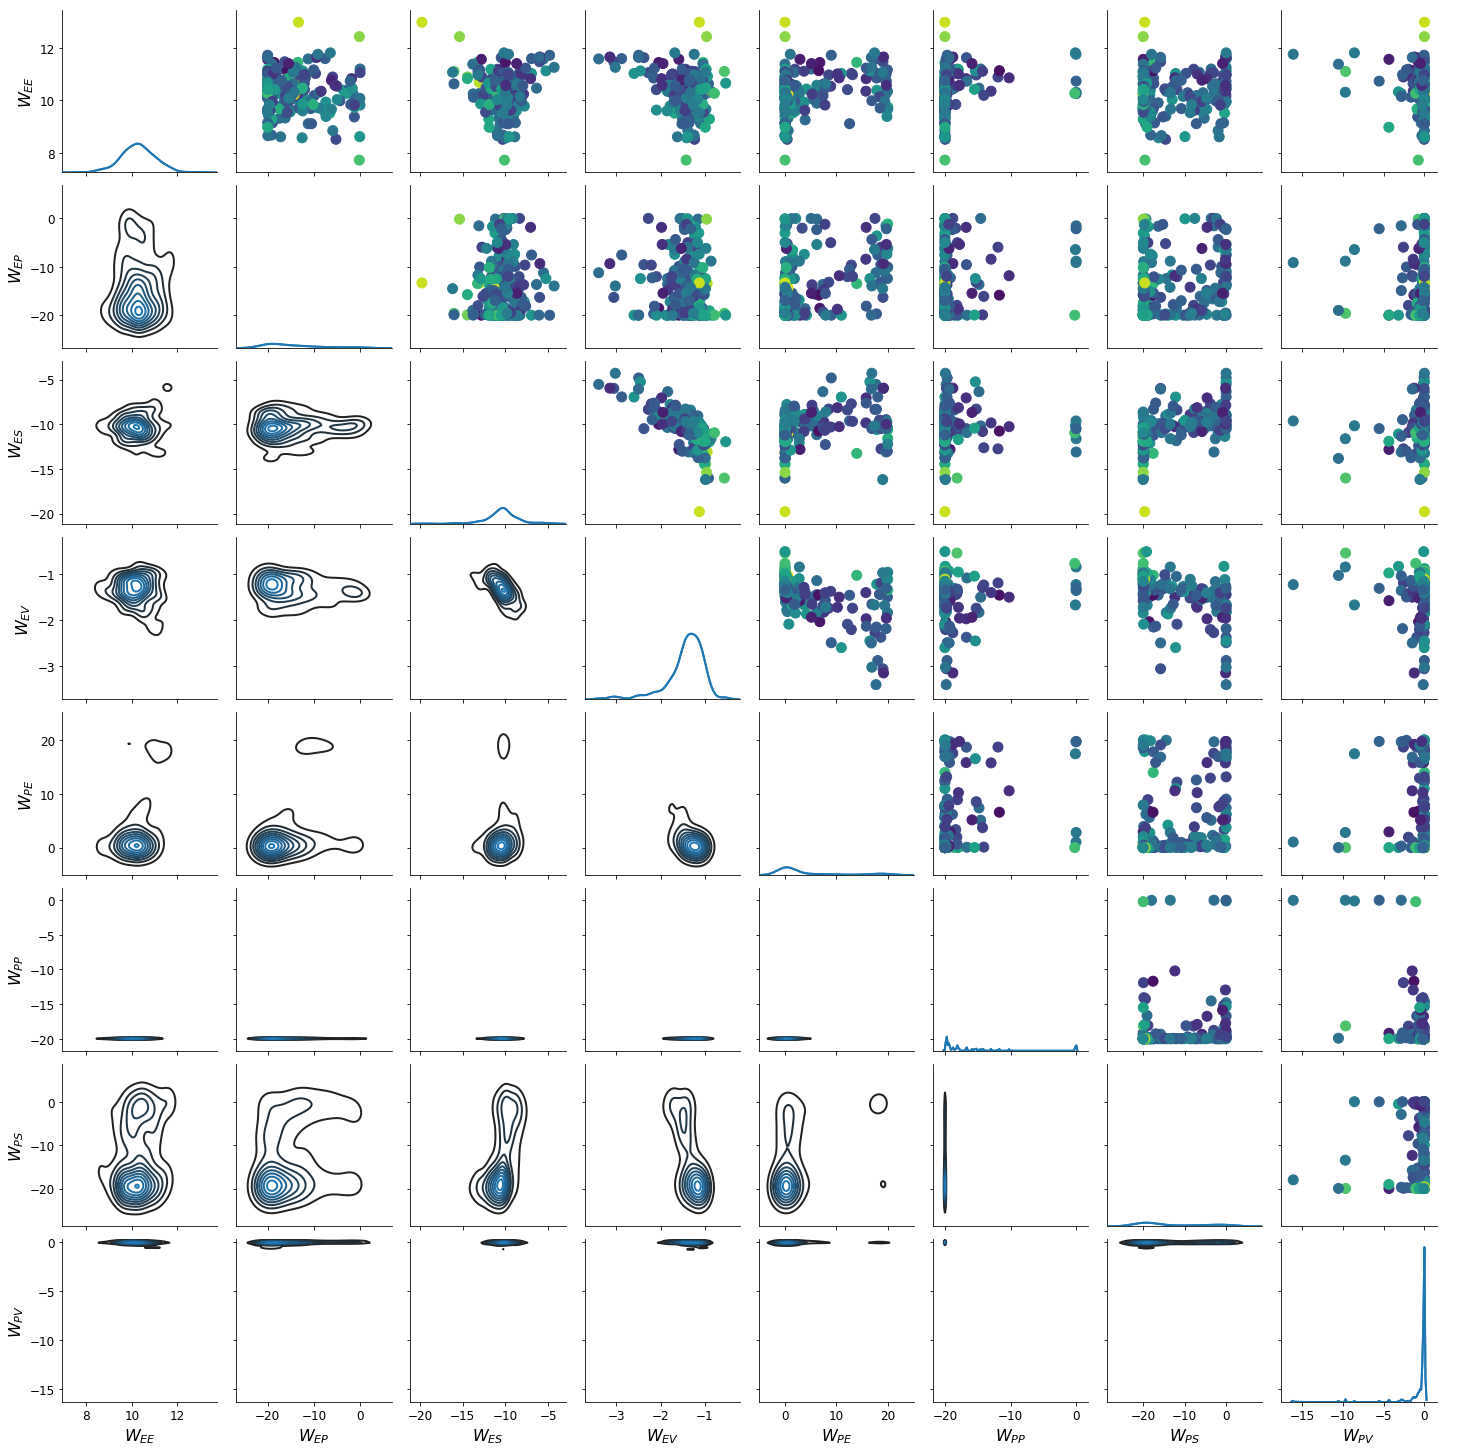

In [11]:
plot_dist(zs[0][-1,:200,:], log_probs[0][-1], kde=True, z_labels=system.z_labels, inds=[i for i in range(8)])

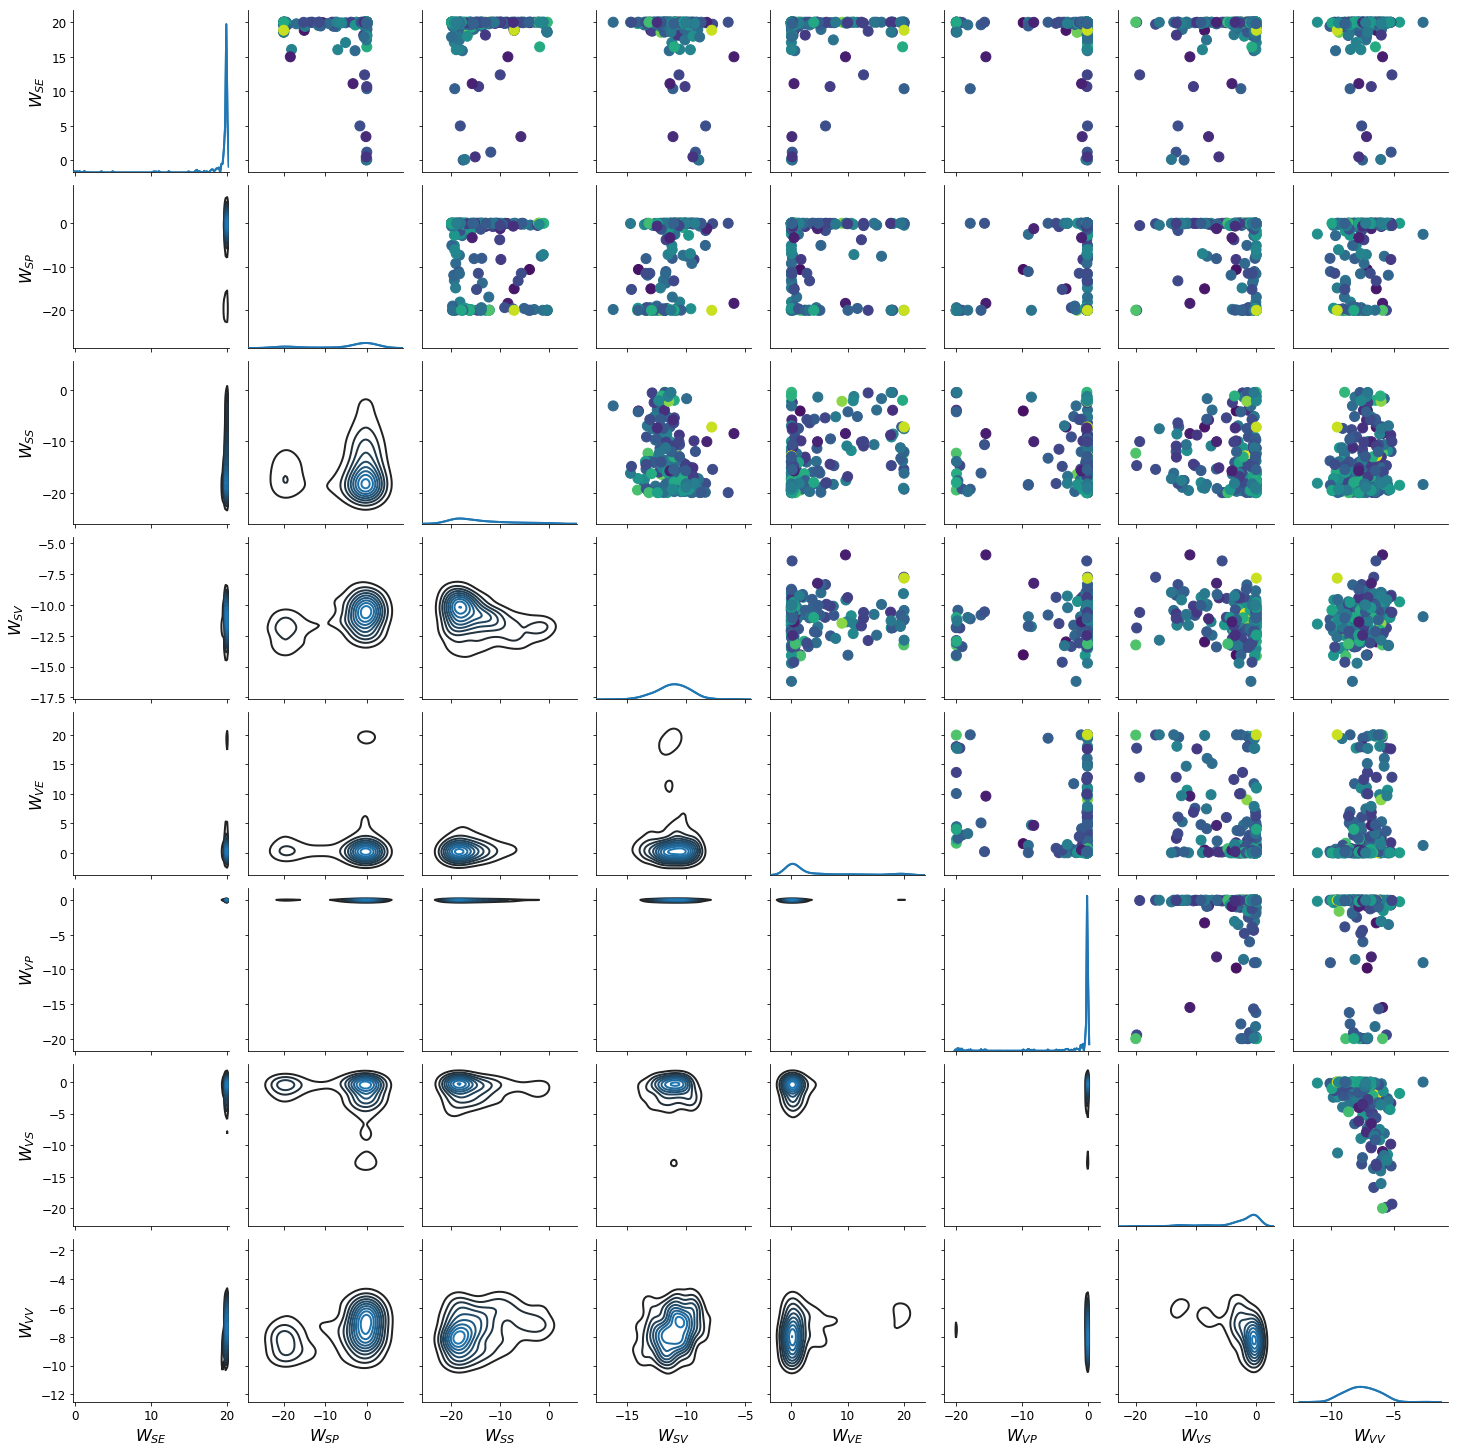

In [12]:
plot_dist(zs[0][-1,:200,:], log_probs[0][-1], kde=True, z_labels=system.z_labels, inds=[i for i in range(8,16)])

In [9]:
#plot_dist(zs[1][-1,:200,:], log_probs[1][-1], kde=True, z_labels=system.z_labels, inds=[i for i in range(16,24)])

In [10]:
#plot_dist(zs[1][-1,:200,:], log_probs[1][-1], kde=True, z_labels=system.z_labels, inds=[i for i in range(24,32)])